In [156]:
# coding: UTF-8
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import h5py
import csv
import math
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.animation as animation
from matplotlib.animation import ArtistAnimation
from sympy import *
from sympy.codegen.cfunctions import log10
    
dir='/Users/maeda/Desktop/Dropbox/analysis/test-feedback/test-runge9/'

i=1
ist=1
nloop=100
nx=128
ny=128
nz=128
nstar=5000

In [157]:
h5file1 = h5py.File(dir+'NAllHDF'+"%03.f"%(i)+'.h5',"r")

folder1="RHO"  #+ str(np.int(sample_frequency)) 
folder2="PHI"  #+ str(np.int(sample_frequency)) 
    
#データ読み込み
Rho  = h5file1[folder1+"/RHO"].value 
Phi = h5file1[folder2+"/PHI"].value 

/Users/maeda/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


In [158]:

dt01 = [0] * nloop
dt02 = [0] * nloop
dt03 = [0] * nloop
dt04 = [0] * nloop
dt05 = [0] * nloop
dt06 = [0] * nloop
dt07 = [0] * nloop
dt08 = [0] * nloop
dt09 = [0] * nloop
dt10 = [0] * nloop
dt11 = [0] * nloop
dt12 = [0] * nloop
dt13 = [0] * nloop
dt14 = [0] * nloop
dt15 = [0] * nloop
dt16 = [0] * nloop
dt17 = [0] * nloop
dt18 = [0] * nloop
dtr=[0] * nloop



for ii in range(1,nloop+1):
    #dt01[ii],dt02[ii],dt03[ii],dt04[ii],dt05[ii],dt06[ii],dt07[ii],dt08[ii],dt09[ii],dt10[ii],dt11[ii],dt12[ii],dt13[ii],dt14[ii],dt15[ii],dt16[ii],dt17[ii],dt18[ii] = np.loadtxt(dir+'ST'+"%03.f"%(ii)+"%03.f"%(ist)+'.dat' , dtype='float32', delimiter=',' )#, usecols=0)#, unpack=True)#comments="#"

    #dt01[ii],dt02[ii],dt03[ii],dt04[ii],dt05[ii],dt06[ii],dt07[ii],dt08[ii],dt09[ii],dt10[ii],dt11[ii],dt12[ii] = np.loadtxt(dir+'ST'+"%03.f"%(ii)+"%03.f"%(ist)+'.dat' , converters=None, dtype='float32', delimiter=',' ,usecols=[0,1, 2, 3, 4,5,6,7,8,9,10,11])#, usecols=0)#, unpack=True)#comments="#"

    #dt01,dt02,dt03,dt04,dt05,dt06,dt07,dt08,dt09,dt10,dt11,dt12 = np.loadtxt(dir+'ST'+"%03.f"%(ii)+"%03.f"%(ist)+'.dat' , converters=None, dtype='float32', delimiter=',' ,usecols=[0,1, 2, 3, 4,5,6,7,8,9,10,11])#, usecols=0)#, unpack=True)#comments="#"

    edata= np.loadtxt(dir+'ST'+"%03.f"%(ii)+"%03.f"%(ist)+'.dat' , delimiter=',' )#, usecols=0)#, unpack=True)#comments="#"
    dt01[ii-1]=edata[0,0]
    dt02[ii-1]=edata[0,1]
    dt03[ii-1]=edata[0,2]
    dtr[ii-1]=np.sqrt((dt01[ii-1]-0.5)*(dt01[ii-1]-0.5)+(dt02[ii-1]-0.5)*(dt02[ii-1]-0.5)+(dt03[ii-1]-0.5)*(dt03[ii-1]-0.5))

#edata,edata[0,1]
#dt01
dtr
    

[0.299999997,
 0.3001775385742837,
 0.3007016950445545,
 0.30159431200937803,
 0.3029082201719789,
 0.304284331087652,
 0.30641170692659847,
 0.30902859531136395,
 0.312007227254981,
 0.315169191224684,
 0.3176659834412546,
 0.32066827159873623,
 0.3233777083234275,
 0.3257005930374542,
 0.3275777147263758,
 0.3287636253900047,
 0.32982732098384243,
 0.33049457192228043,
 0.33074546057527504,
 0.3305648835263501,
 0.33008557718452086,
 0.32903052696566615,
 0.3273741337073331,
 0.32516559035905623,
 0.3224250437486319,
 0.3199013602870758,
 0.3164512054325756,
 0.3128473697446819,
 0.3093064156272293,
 0.3060692942635375,
 0.3037972753140089,
 0.30145910456481356,
 0.29969709532636063,
 0.2985311912229888,
 0.297981645913418,
 0.2979910592546247,
 0.29862156560160175,
 0.30001110570854184,
 0.3021445883296237,
 0.30509049330648635,
 0.3079702448280597,
 0.31205253104291564,
 0.3164425232566934,
 0.3208854720004504,
 0.3251698974369451,
 0.32837761781775743,
 0.33200376286305816,
 0.335

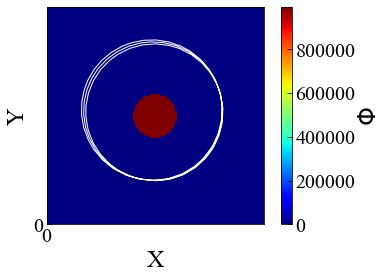

In [165]:
data01=Rho[:,:,64]
data02=Phi[64,:,:]#Phi[:,:,64]

#dtr=np.sqrt(dt01*dt01+dt02*dt02+dt03*dt03)

fig = plt.figure()
ax = fig.add_subplot(111)
#fig.subplots_adjust(bottom=0, left=0, top=1, right=1)

plt.rcParams["font.family"] = "Times New Roman"      #全体のフォントを設定
plt.rcParams["xtick.direction"] = "in"               #x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams["ytick.direction"] = "in"               #y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
#plt.rcParams["xtick.minor.visible"] = True          #x軸補助目盛りの追加
#plt.rcParams["ytick.minor.visible"] = True          #y軸補助目盛りの追加
#plt.rcParams["xtick.major.width"] = 1.5              #x軸主目盛り線の線幅
#plt.rcParams["ytick.major.width"] = 1.5              #y軸主目盛り線の線幅
#plt.rcParams["xtick.minor.width"] = 1.0              #x軸補助目盛り線の線幅
#plt.rcParams["ytick.minor.width"] = 1.0              #y軸補助目盛り線の線幅
plt.rcParams["xtick.major.size"] = 5                #x軸主目盛り線の長さ
plt.rcParams["ytick.major.size"] = 5                #y軸主目盛り線の長さ
#plt.rcParams["xtick.minor.size"] = 5                #x軸補助目盛り線の長さ
#plt.rcParams["ytick.minor.size"] = 5                #y軸補助目盛り線の長さ
plt.rcParams["font.size"] = 20                       #フォントの大きさ
#plt.rcParams["axes.linewidth"] = 1.5                 #囲みの太さ


x = np.arange(0.0, 1.001, 1.0/128.0)
y = np.arange(0.0, 1.001, 1.0/128.0)

plt.pcolormesh(x,y,data01, cmap='jet') # 等高線図の生成。cmapで色付けの規則を指定する。


#plt.clim(-5.0, 1200.0)
pp=plt.colorbar (orientation="vertical") # カラーバーの表示 "vertical"
pp.set_label("$\Phi$", fontsize=24) #カラーバーのラベル
plt.xlim([-0.0, 1.0]) # x方向の描画範囲を指定
plt.ylim([-0.0, 1.0]) # y方向の描画範囲を指定
plt.xlabel('X', fontsize=24)
plt.ylabel('Y', fontsize=24)
plt.xticks(np.arange(0.0, 1.001, step=20))
plt.yticks(np.arange(0.0, 1.001, step=20))
#fig = plt.figure(figsize=(5, 5))
#ax.set_aspect('equal', adjustable='box')
#quadmesh.set_clim(vmin=0, vmax=15)
#plt.axes().set_aspect('equal', 'datalim')
plt.gca().set_aspect('equal')

plt.plot(dt02,dt03,color='white', linewidth = 1) 

#pp = PdfPages('/Users/maeda/Desktop/phi'+"%03.f"%(i)+'.pdf')
pp = PdfPages('/Users/maeda/Desktop/phiexa.pdf')
# 画像をPDFとして保存する
pp.savefig(fig, bbox_inches='tight')
# PDFの保存終了
pp.close()


plt.show()

In [ ]:
'''
fig = plt.figure()
ax = fig.add_subplot(111)
#fig.subplots_adjust(bottom=0, left=0, top=1, right=1)

plt.rcParams["font.family"] = "Times New Roman"      #全体のフォントを設定
plt.rcParams["xtick.direction"] = "in"               #x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams["ytick.direction"] = "in"               #y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
#plt.rcParams["xtick.minor.visible"] = True          #x軸補助目盛りの追加
#plt.rcParams["ytick.minor.visible"] = True          #y軸補助目盛りの追加
#plt.rcParams["xtick.major.width"] = 1.5              #x軸主目盛り線の線幅
#plt.rcParams["ytick.major.width"] = 1.5              #y軸主目盛り線の線幅
#plt.rcParams["xtick.minor.width"] = 1.0              #x軸補助目盛り線の線幅
#plt.rcParams["ytick.minor.width"] = 1.0              #y軸補助目盛り線の線幅
plt.rcParams["xtick.major.size"] = 5                #x軸主目盛り線の長さ
plt.rcParams["ytick.major.size"] = 5                #y軸主目盛り線の長さ
#plt.rcParams["xtick.minor.size"] = 5                #x軸補助目盛り線の長さ
#plt.rcParams["ytick.minor.size"] = 5                #y軸補助目盛り線の長さ
plt.rcParams["font.size"] = 20                       #フォントの大きさ
#plt.rcParams["axes.linewidth"] = 1.5                 #囲みの太さ


dtt = np.arange(0.0, 1.001, 1.0/nloop)


plt.plot(dtt,dtr,color='blue', linewidth = 1) 

plt.show()
'''